# 5.6.2 Homework: HeapSort

- Name: Congxin (David) Xu
- Computing ID: cx2rx

### Question 1: Create a Binary Search Tree
#### Part 1
- **List 1**: Leo, Hester, Ressie, Keira, Damian, Victor, Collin, Marci, Ashlie, Willis, Eric, Mya, Elizabeth, Ralph

    1. List out the tree created by the add order of list 1 using post-order traversal.
    2. If we removed the node containing Damian, what two values could we replace it with?
    3. What if we removed the node containing Ressie?

**Answer**

1. [Ashlie, Collin, Elizabeth, Eric, Damian, Keira, Hester, Ralph, Mya, Marci, Willis, Victor, Ressie, Leo]
2. The two values we could replace Damian with are *Collin* and *Elizabeth*.
3. If we removed the node containing Ressie, we can replace it with *Victor*, or *Ralph*.

#### Part 2
- **List 2**: Victor, Ralph, Leo, Mya, Eric, Elizabeth, Hester, Damian, Willis, Collin, Keira, Marci, Ashlie, Ressie

    1. List out the tree created by the add order of list 2 using post-order traversal.

**Answer**
1. [Ashlie, Collin, Damian, Elizabeth, Keira, Hester, Eric, Marci, Mya, Leo, Ressie, Ralph, Willis, Victor]

#### Part 3
- Compare the tree from list 1 with the tree from list 2, which do you think would perform better for the add and remove methods?

**Answer**

I think the List 1 is going to perform better for the add and remove methods because it is more balanced comparing List 2.

### Question 2
Given an array A[1, ..., n], with distinct values and k with $1 \leq k \leq n$. We want to return the k smallest element of A[1, ...,n], in non-decreasing order. For example: A = [5, 4, 6, 2, 10] and $k = 4$, the algorithm returns [2, 4, 5, 6]. There are at least the following four approaches:

1. heapify A and then extract k elements one by one;
2. sort the array (e.g. using MergeSort or HeapSort) and then read the first k elements;
3. apply the selection procedure k times to find the 1st, 2nd,..., the k’th smallest element;
4. apply selection procedure to find the k’th smallest element, then use that element to find the k smallest elements, and then sort those k elements.

For each approach, find the asymptotic worst-case running time which should
be of the form $\Theta(f(n, k))$.
Now assume $k = \sqrt{n}$. Then for each approach express the asymptotic
running-time as a function of $n$ only.

**Answer**
1. $\Theta(f(n, k)) = \Theta(k log n)$. 
    - If we assume $k = \sqrt{n}$, then $\Theta(f(n, k)) = \Theta(\sqrt{n} log n)$
2. $\Theta(f(n, k)) = \Theta(n log n + k) = \Theta(n log n)$. 
    - If we assume $k = \sqrt{n}$, then $\Theta(f(n, k)) = \Theta(n log n + \sqrt{n}) = \Theta(n log n)$
3. If we use randomized selection procedure, it will take $\Theta(n)$. Therefore, $\Theta(f(n, k)) = \Theta(k * n)$. 
    - If we assume $k = \sqrt{n}$, then $\Theta(f(n, k)) = \Theta(\sqrt{n} * n) = \Theta(n^{3/2})$
4. If we use randomized selection procedure, it will take $\Theta(n)$. Therefore $\Theta(f(n, k)) = \Theta(2n + klogk) = \Theta(n + klogk)$. 
    - If we assume $k = \sqrt{n}$, then $\Theta(f(n, k)) = \Theta(n + \sqrt{n}log\sqrt{n}) = \Theta(n)$.

### Question 3
- Implement HeapSort. Submit your code in Jupyter notebook format along with some test results and discuss if your results are supporting the claim of $\Theta(n lg n)$.
- Compare the performance of HeapSort with MergeSort and Quick-Sort (no coding is required, however you can code if helps in your answer).

**Answer**

Following the pesudo code provided within Chapter 6 of the Introdution to Algorithm, I come up with the following program:

In [1]:
# Define a Heap class
class Heap:
    def __init__(self, array):
        self.array = array
        self.length = len(array)
        self.heap_size = len(self.array)
           
    def Left(self, i):
        return 2*i + 1
    
    def Right(self,i):
        return 2*i + 2

In [2]:
# Using Max Heap for HeapSort
def Max_Heapify(A, i):
    # Get the index of the child nodes
    l = A.Left(i) 
    r = A.Right(i)
    
    # Find the max value among left, root and right
    if l < A.heap_size and A.array[l] > A.array[i]:
        largest = l
    else:
        largest = i
    
    if r < A.heap_size and A.array[r] > A.array[largest]:
        largest = r
    
    # Change the root if root is not the max
    if largest != i:
        A.array[i], A.array[largest] = A.array[largest], A.array[i]
        Max_Heapify(A, largest)

In [3]:
# Make sure we have a max heap
def Build_Max_Heap(A):
    A.heap_size = A.length
    for i in range(A.length // 2 - 1, -1, -1):
        Max_Heapify(A, i)

In [4]:
# Main function 
def Heapsort(A):
    Build_Max_Heap(A)
    for i in range(A.length - 1, 0, -1):
        A.array[0], A.array[i] = A.array[i], A.array[0]
        A.heap_size = i
        Max_Heapify(A, 0)
        # print(A.array)

In [5]:
A = [1,3,2,5,6,9,10,7,0]
H = Heap(A)
Heapsort(H)
A

[0, 1, 2, 3, 5, 6, 7, 9, 10]

My Heapsort algorithm supports the claim that the time complexity of this algorithm is $\Theta(nlogn).$ because in my `Heapsort()` function, it will take $\Theta(log n)$ to `Max_Heapify()` the list and it is going to run this `Max_Heapify()` function $n - 1$ times. `Build_Max_Heap()` function will also run the `Max_Heapify()` function $n // 2$ times. Therefore, the final time complexity for the entire `Heapsort()` function is $\Theta(n log n)$.

In [6]:
# Merge_sort functions is copied from https://www.geeksforgeeks.org/merge-sort/ only for performance comparison 
def merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values

# Quick sort functions is copied from https://www.geeksforgeeks.org/python-program-for-quicksort/ 
# only for performance comparison 

def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
 
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
 
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
 
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
 
# Function to do Quick sort
 
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

        
# playing with the code
import random
import time

def run_trials(f, n, numTrials):
    """ Run numTrials of f with list of size n.  Return the average time taken. """
    total_time = 0
    for _ in range(numTrials):
        array = gen_trial(n)
        start = time.time()
        f(array)
        total_time += time.time() - start
    return total_time / numTrials

def run_trials_quicksort(f, n, numTrials):
    """ Run numTrials of f with list of size n.  Return the average time taken. """
    total_time = 0
    for _ in range(numTrials):
        array = gen_trial(n)
        start = time.time()
        f(array, low = 0, high = len(array) - 1)
        total_time += time.time() - start
    return total_time / numTrials

def run_trials_heapsort(f, n, numTrials):
    """ Run numTrials of f with list of size n.  Return the average time taken. """
    total_time = 0
    for _ in range(numTrials):
        array = gen_trial(n)
        start = time.time()
        f(Heap(array))
        total_time += time.time() - start
    return total_time / numTrials

def gen(n):
    l = list(map(lambda x: random.randint(1, 2*n), range(n)))
    return l


def gen_trial(n):
    array = gen(n)
    # pick a value in the array
    # we can get an outlier for cases where A[n] is picked.
    return (array)

n = 1
durations1 = []
print('Merge sort for unsorted data') 
for i in range(6,12):
    n = 2 ** i
    for i in range(1):
        duration1 = run_trials(merge_sort, n, 20)
        durations1.append([n, duration1])
        print(f"n = {n:-30} - duration: {duration1}")

print('Quick sort for unsorted data') 
durations2 = []
for i in range(6,12):
    n = 2 ** i
    for i in range(1):
        duration2 = run_trials_quicksort(quickSort, n, 20)
        durations2.append([n, duration2])
        print(f"n = {n:-30} - duration: {duration2}")
            
print('Quick sort for unsorted data') 
durations3 = []
for i in range(6,12):
    n = 2 ** i
    for i in range(1):
        duration3 = run_trials_heapsort(Heapsort, n, 20)
        durations3.append([n, duration3])
        print(f"n = {n:-30} - duration: {duration3}")

Merge sort for unsorted data
n =                             64 - duration: 0.00019952058792114258
n =                            128 - duration: 9.974241256713868e-05
n =                            256 - duration: 0.0010972380638122558
n =                            512 - duration: 0.0025929808616638184
n =                           1024 - duration: 0.005235850811004639
n =                           2048 - duration: 0.010676431655883788
Quick sort for unsorted data
n =                             64 - duration: 0.00010315179824829101
n =                            128 - duration: 0.00019779205322265626
n =                            256 - duration: 0.0005507230758666992
n =                            512 - duration: 0.0008942484855651855
n =                           1024 - duration: 0.002390432357788086
n =                           2048 - duration: 0.004985940456390381
Quick sort for unsorted data
n =                             64 - duration: 0.0002991676330566406
n =              

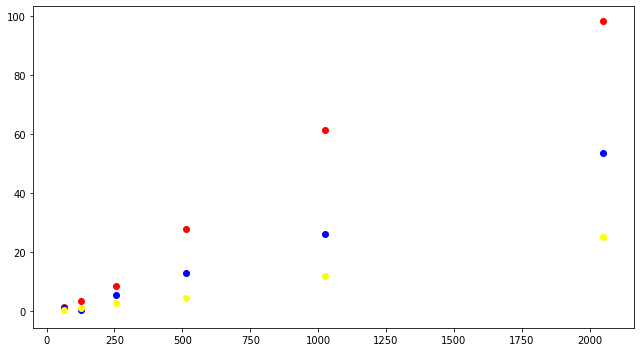

In [7]:
import matplotlib.pyplot as plt
import math
scale = durations1[0][1]
fig, ax = plt.subplots(1,1,figsize=(9,5))
# Heap Sort
x = [d[0] for d in durations3]
y = [d[1]/scale for d in durations3]
plt.scatter(x, y,color='red',)

# Merge Sort
x2 = [d[0] for d in durations1]
y2 = [d[1]/scale for d in durations1]
plt.scatter(x2, y2,color='blue')

# Quick Sort
x3 = [d[0] for d in durations2]
y3 = [d[1]/scale for d in durations2]
plt.scatter(x3, y3,color='yellow')

plt.tight_layout()
plt.show()

All of them takes $\Theta(nlogn)$ to sort an array. However, from the graph above, as $n$ increases, we can see that `Heapsort (Red)` is slower than `MergeSort (Blue)`, which is slower than `QuickSort (Yellow)` with a random pivot. 